<a href="https://colab.research.google.com/github/20149312/Ha-Thanh-Hung-20149312/blob/main/MON_AN_VIET_NAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/COLAB NOTEBOOK/FOOD

/content/drive/MyDrive/COLAB NOTEBOOK/FOOD


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/COLAB NOTEBOOK/FOOD/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 326 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'BANH MI': 0, 'BANH PIA': 1, 'BANH TET': 2, 'PHO': 3}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50 ,batch_size=128,verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=11)])

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 5.5301 - accuracy: 0.2853 

11/11 [==============================] - 136s 12s/step - loss: 5.5301 - accuracy: 0.2853
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.3262 - accuracy: 0.3528

11/11 [==============================] - 6s 522ms/step - loss: 1.3262 - accuracy: 0.3528
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.3190 - accuracy: 0.3773

11/11 [==============================] - 6s 576ms/step - loss: 1.3190 - accuracy: 0.3773
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 1.2093 - accuracy: 0.4387

11/11 [==============================] - 7s 621ms/step - loss: 1.2093 - accuracy: 0.4387
Epoch 5/50
11/11 [==============================] - ETA: 0s - loss: 1.2448 - accuracy: 0.4018

11/11 [==============================] - 6s 521ms/step - loss: 1.2448 - accuracy: 0.4018
Epoch 6/50
11/11 [==============================] - ETA: 0s - loss: 1.1471 - accuracy: 0.4816

11/11 [==============================] - 6s 524ms/step - loss: 1.1471 - accuracy: 0.4816
Epoch 7/50
11/11 [==============================] - ETA: 0s - loss: 1.0328 - accuracy: 0.5552

11/11 [==============================] - 6s 505ms/step - loss: 1.0328 - accuracy: 0.5552
Epoch 8/50
11/11 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.6012

11/11 [==============================] - 6s 518ms/step - loss: 0.9739 - accuracy: 0.6012
Epoch 9/50
11/11 [==============================] - ETA: 0s - loss: 0.9207 - accuracy: 0.5920

11/11 [==============================] - 6s 523ms/step - loss: 0.9207 - accuracy: 0.5920
Epoch 10/50
11/11 [==============================] - ETA: 0s - loss: 0.9690 - accuracy: 0.5644

11/11 [==============================] - 6s 535ms/step - loss: 0.9690 - accuracy: 0.5644
Epoch 11/50
11/11 [==============================] - ETA: 0s - loss: 0.8951 - accuracy: 0.6350

11/11 [==============================] - 6s 519ms/step - loss: 0.8951 - accuracy: 0.6350
Epoch 12/50
11/11 [==============================] - ETA: 0s - loss: 0.7755 - accuracy: 0.6503

11/11 [==============================] - 6s 511ms/step - loss: 0.7755 - accuracy: 0.6503
Epoch 13/50
11/11 [==============================] - ETA: 0s - loss: 0.7241 - accuracy: 0.6933

11/11 [==============================] - 6s 525ms/step - loss: 0.7241 - accuracy: 0.6933
Epoch 14/50
11/11 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.6933

11/11 [==============================] - 6s 525ms/step - loss: 0.7522 - accuracy: 0.6933
Epoch 15/50
11/11 [==============================] - ETA: 0s - loss: 0.6143 - accuracy: 0.7669

11/11 [==============================] - 6s 522ms/step - loss: 0.6143 - accuracy: 0.7669
Epoch 16/50
11/11 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.7546

11/11 [==============================] - 6s 536ms/step - loss: 0.6072 - accuracy: 0.7546
Epoch 17/50
11/11 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.7791

11/11 [==============================] - 6s 520ms/step - loss: 0.5556 - accuracy: 0.7791
Epoch 18/50
11/11 [==============================] - ETA: 0s - loss: 0.5825 - accuracy: 0.7607

11/11 [==============================] - 6s 523ms/step - loss: 0.5825 - accuracy: 0.7607
Epoch 19/50
11/11 [==============================] - ETA: 0s - loss: 0.5692 - accuracy: 0.7914

11/11 [==============================] - 6s 535ms/step - loss: 0.5692 - accuracy: 0.7914
Epoch 20/50
11/11 [==============================] - ETA: 0s - loss: 0.4460 - accuracy: 0.8466

11/11 [==============================] - 6s 534ms/step - loss: 0.4460 - accuracy: 0.8466
Epoch 21/50
11/11 [==============================] - ETA: 0s - loss: 0.5311 - accuracy: 0.7791

11/11 [==============================] - 6s 521ms/step - loss: 0.5311 - accuracy: 0.7791
Epoch 22/50
11/11 [==============================] - ETA: 0s - loss: 0.4816 - accuracy: 0.8313

11/11 [==============================] - 6s 528ms/step - loss: 0.4816 - accuracy: 0.8313
Epoch 23/50
11/11 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.8374

11/11 [==============================] - 6s 526ms/step - loss: 0.4150 - accuracy: 0.8374
Epoch 24/50
11/11 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.8589

11/11 [==============================] - 6s 528ms/step - loss: 0.3906 - accuracy: 0.8589
Epoch 25/50
11/11 [==============================] - ETA: 0s - loss: 0.3492 - accuracy: 0.8773

11/11 [==============================] - 6s 514ms/step - loss: 0.3492 - accuracy: 0.8773
Epoch 26/50
11/11 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.9110

11/11 [==============================] - 6s 538ms/step - loss: 0.2889 - accuracy: 0.9110
Epoch 27/50
11/11 [==============================] - ETA: 0s - loss: 0.2976 - accuracy: 0.8926

11/11 [==============================] - 6s 534ms/step - loss: 0.2976 - accuracy: 0.8926
Epoch 28/50
11/11 [==============================] - ETA: 0s - loss: 0.3274 - accuracy: 0.8804

11/11 [==============================] - 6s 532ms/step - loss: 0.3274 - accuracy: 0.8804
Epoch 29/50
11/11 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.8957

11/11 [==============================] - 6s 528ms/step - loss: 0.2699 - accuracy: 0.8957
Epoch 30/50
11/11 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9479

11/11 [==============================] - 6s 540ms/step - loss: 0.1546 - accuracy: 0.9479
Epoch 31/50
11/11 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.9509

11/11 [==============================] - 6s 600ms/step - loss: 0.1809 - accuracy: 0.9509
Epoch 32/50
11/11 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.9172

11/11 [==============================] - 6s 527ms/step - loss: 0.2514 - accuracy: 0.9172
Epoch 33/50
11/11 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8926

11/11 [==============================] - 6s 524ms/step - loss: 0.3405 - accuracy: 0.8926
Epoch 34/50
11/11 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8896

11/11 [==============================] - 6s 518ms/step - loss: 0.2949 - accuracy: 0.8896
Epoch 35/50
11/11 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9387

11/11 [==============================] - 6s 507ms/step - loss: 0.2024 - accuracy: 0.9387
Epoch 36/50
11/11 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.9601

11/11 [==============================] - 6s 581ms/step - loss: 0.1377 - accuracy: 0.9601
Epoch 37/50
11/11 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9387

11/11 [==============================] - 6s 510ms/step - loss: 0.1528 - accuracy: 0.9387
Epoch 38/50
11/11 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9755

11/11 [==============================] - 6s 529ms/step - loss: 0.0869 - accuracy: 0.9755
Epoch 39/50
11/11 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9693

11/11 [==============================] - 6s 516ms/step - loss: 0.1193 - accuracy: 0.9693
Epoch 40/50
11/11 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9540

11/11 [==============================] - 6s 527ms/step - loss: 0.1124 - accuracy: 0.9540
Epoch 41/50
11/11 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9693

11/11 [==============================] - 6s 539ms/step - loss: 0.0918 - accuracy: 0.9693
Epoch 42/50
11/11 [==============================] - ETA: 0s - loss: 0.1189 - accuracy: 0.9571

11/11 [==============================] - 6s 537ms/step - loss: 0.1189 - accuracy: 0.9571
Epoch 43/50
11/11 [==============================] - ETA: 0s - loss: 0.1779 - accuracy: 0.9417

11/11 [==============================] - 6s 519ms/step - loss: 0.1779 - accuracy: 0.9417
Epoch 44/50
11/11 [==============================] - ETA: 0s - loss: 0.1375 - accuracy: 0.9540

11/11 [==============================] - 6s 578ms/step - loss: 0.1375 - accuracy: 0.9540
Epoch 45/50
11/11 [==============================] - ETA: 0s - loss: 0.0979 - accuracy: 0.9724

11/11 [==============================] - 6s 529ms/step - loss: 0.0979 - accuracy: 0.9724
Epoch 46/50
11/11 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9908

11/11 [==============================] - 6s 530ms/step - loss: 0.0524 - accuracy: 0.9908
Epoch 47/50
11/11 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9847

11/11 [==============================] - 7s 628ms/step - loss: 0.0474 - accuracy: 0.9847
Epoch 48/50
11/11 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9571

11/11 [==============================] - 6s 509ms/step - loss: 0.1231 - accuracy: 0.9571
Epoch 49/50
11/11 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9693

11/11 [==============================] - 6s 516ms/step - loss: 0.0844 - accuracy: 0.9693
Epoch 50/50
11/11 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9632

11/11 [==============================] - 6s 503ms/step - loss: 0.1053 - accuracy: 0.9632


In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08861564099788666
Train Accuracy 0.9693251252174377


In [ ]:
model.save("FoodFood.h5")

In [ ]:
model_CNN=load_model('FoodFood.h5')

1/1 [==============================] - 0s 324ms/step
Banh tet


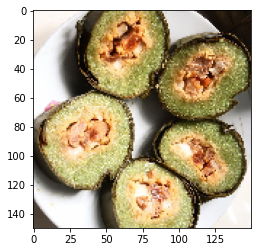

1/1 [==============================] - 0s 16ms/step
Pho


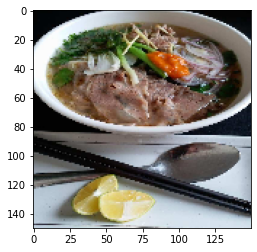

1/1 [==============================] - 0s 17ms/step
Banh mi


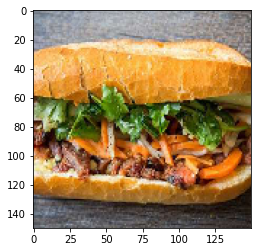

1/1 [==============================] - 0s 17ms/step
Banh pia


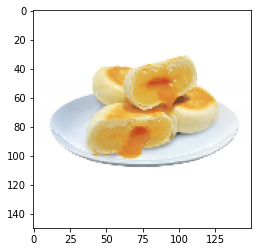

In [ ]:
test="/content/drive/MyDrive/COLAB NOTEBOOK/FOOD/TEST"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh mi'
  if round(result[0][1])==1:
    prediction='Banh pia'
  if round(result[0][2])==1:
    prediction='Banh tet'
  if round(result[0][3])==1:
    prediction='Pho'
  print(prediction)
  plt.show()